In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
df = pd.read_csv('Churn_Modelling.csv')

In [58]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df.shape

(10000, 14)

In [60]:
# TO check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
# Duplicated row

df.duplicated().sum()

0

In [62]:
# How many customers left the bank
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [63]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [64]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [65]:
# Removing a few non important columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [66]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
# One hot encoding

df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [68]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [69]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [70]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [71]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [72]:
X_train.shape

(8000, 11)

In [74]:
# Scaling input columns (to make the convergence fast in weight training)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [76]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [102]:
# Model building stage

# Building sequential model
# In this we are designing NN with 1 Input layer (with 11 input nodes since we have 11 I/P features), 2 Hidden layer(with 11 nodes in each) and 1 output layer(with 1 node)

model = Sequential()

model.add(Dense(11, activation= 'relu', input_dim = 11))        # First hidden layer with 11 nodes and relu activation function which is connected to a Input layer which has 11 nodes
model.add(Dense(11, activation= 'relu'))                       # Second hidden layer with 11 nodes and relu activation function
model.add(Dense(1, activation = 'sigmoid'))                     # Output layer with 1 node and sigmoid activation function



In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Model compiltation stage  - Decide loss funciton, optimizer for gradient descent etc

# Binary classification model hence loss function we use here is binary cross entropy (or log loss) and optimizer will be adam optimizer
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [117]:
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)   # validation_split = will train on 80% of training data and test on 20% of training data

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 35.5618 - accuracy: 0.6905 - val_loss: 60.3323 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 24.0301 - accuracy: 0.6994 - val_loss: 19.0587 - val_accuracy: 0.7937
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 21.3214 - accuracy: 0.7000 - val_loss: 43.9027 - val_accuracy: 0.7956
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 27.7362 - accuracy: 0.6959 - val_loss: 23.4563 - val_accuracy: 0.7794
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 41.4100 - accuracy: 0.6845 - val_loss: 14.9549 - val_accuracy: 0.6800
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 19.7997 - accuracy: 0.6994 - val_loss: 10.6488 - val_accuracy: 0.7950
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 25.5778 - accuracy: 0.6972 - val_loss: 40.8126 - val_ac

### **Higher accuracy (model accuracy) and less validation accuracy may lead to Overfitting**

In [125]:
# You will see an array of 121 weights connecting 11 nodes of input layer with 11 nodes of first Input layer. 
#You will also see an array of 11 Bias values for 11 nodes of First Hidden layer 

model.layers[0].get_weights()

[array([[ 3.7454617e-01, -7.4808496e-01, -2.4179061e-01,  2.9375458e-01,
         -1.0655868e-01, -3.4550416e-01, -2.3888825e-01,  1.2994280e-01,
         -6.1818290e-01,  2.2024931e-01,  3.0079493e-01],
        [ 1.9196271e+00, -7.7790260e-01,  2.0415084e+00, -1.6674474e+00,
          3.4217435e-01, -2.6143193e-03,  4.3097678e-01,  8.0773479e-01,
         -1.9035113e+00, -2.3802974e+00,  2.2551389e+00],
        [-6.8044519e-01,  2.4799271e-01, -5.3847843e-01,  1.0514672e+00,
          4.3992895e-01, -3.2432812e-01, -1.1867073e+00,  2.2970531e-02,
          9.7825360e-01,  6.3929534e-01, -8.3462650e-01],
        [-2.5810620e-02,  3.5395320e-03,  3.9393169e-01,  1.0820054e-01,
         -3.7215376e-01, -2.1757582e-01,  1.2902457e-03, -3.8540247e-01,
          6.1997425e-02,  3.6999276e-01,  2.6797864e-01],
        [-2.7228892e-02, -8.2736033e-01, -3.1929737e-01,  6.8881947e-01,
         -3.5671878e-01, -3.1585521e-01,  5.4783595e-01,  9.1072702e-01,
         -1.0254111e+00, -1.1159683e+0

In [126]:
# You will see an array of 121 weights connecting 11 nodes of First Hidden layer with 11 nodes of Second Hidden layer. 
#You will also see an array of 11 Bias values for 11 nodes of Second Hidden layer 

model.layers[1].get_weights()

[array([[-5.43984652e-01,  3.72679144e-01,  2.80460179e-01,
          7.23650455e-02, -4.95232701e-01,  6.79615289e-02,
         -2.47319832e-01,  1.64036438e-01,  4.09761697e-01,
          6.00689091e-02, -8.55842382e-02],
        [-1.86816573e-01,  4.74235639e-02,  3.37217391e-01,
          2.00195052e-02,  8.21769834e-02, -4.35526729e-01,
         -2.48583928e-01,  2.02657551e-01,  5.17758548e-01,
          3.89191478e-01,  4.96401578e-01],
        [-2.93833286e-01,  2.63090849e-01,  3.08374047e-01,
          2.18358487e-01,  1.40128970e-01, -8.87716748e-03,
         -2.13804260e-01,  1.39993623e-01,  2.83183604e-01,
          2.04052642e-01,  4.76515770e-01],
        [ 3.97132456e-01,  2.96743840e-01, -4.67417240e-01,
          1.26077072e-03, -1.88674182e-01, -5.45841530e-02,
         -3.81406099e-02,  3.73819828e-01, -1.47257254e-01,
          3.44750017e-01, -1.77593306e-02],
        [-5.05177915e-01, -5.31131327e-02, -1.39533281e-01,
         -1.90406740e-01, -1.90134555e-01,  

In [127]:
# You will see an array of 11 weights connecting 11 nodes of Second Hidden layer with 1 nodes of Output layer. 
#You will also see an array of 1 Bias values for 1 nodes of Output layer 

model.layers[2].get_weights()

[array([[ 0.08203927],
        [ 0.5879232 ],
        [-0.34765226],
        [ 0.01388128],
        [ 0.31137723],
        [ 0.00241706],
        [ 0.5577371 ],
        [-0.32696998],
        [ 0.09187949],
        [-0.5470137 ],
        [ 0.39920086]], dtype=float32), array([-0.3234937], dtype=float32)]

In [128]:
# We get an array of values for each test point ranging between 0 - 1 since we have applied Sigmoid activation function

y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [129]:
# Let's say if the predicted value above is > 0.5 then the output should be 1 (customer will exit from bank) else will not exit from bank
y_pred = np.where(y_log > 0.5, 1, 0)

In [133]:
# Accuracy of model

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6955

In [134]:
import matplotlib.pyplot as plt

In [135]:
# We get 4 key-value pairs here: 1. loss in each epoch, 2. accuracy in each epoch.  3. validation loss in each epoch.  4. validation accuracy in each epoch

history.history

{'loss': [35.561824798583984,
  24.030067443847656,
  21.321386337280273,
  27.736196517944336,
  41.40999984741211,
  19.799665451049805,
  25.57782554626465,
  34.1100959777832,
  23.381301879882812,
  29.036888122558594,
  29.475168228149414,
  22.292089462280273,
  20.592872619628906,
  22.923511505126953,
  23.835954666137695,
  19.987096786499023,
  21.12572479248047,
  30.479421615600586,
  32.0593376159668,
  21.880037307739258,
  19.54598045349121,
  23.66104507446289,
  20.130043029785156,
  18.855663299560547,
  28.7191104888916,
  29.292644500732422,
  21.78287124633789,
  17.540746688842773,
  24.20703125,
  33.38777542114258,
  22.069772720336914,
  20.946128845214844,
  25.528915405273438,
  22.652978897094727,
  27.832107543945312,
  21.066539764404297,
  17.809650421142578,
  17.954347610473633,
  29.905885696411133,
  17.844575881958008,
  25.635875701904297,
  18.136552810668945,
  26.08404541015625,
  21.42755889892578,
  21.931537628173828,
  24.979022979736328,
  

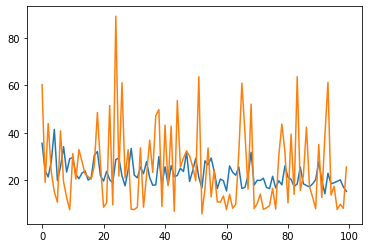

In [138]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

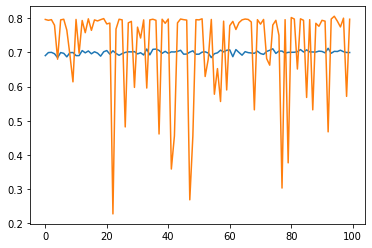

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])